<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the blood varied with sport, body size, and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
white blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [2]:
# Set the number of threads to be 1 for K Means to proceed without warnings
import os
os.environ['OMP_NUM_THREADS'] = '1'


In [43]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
import seaborn as sns

### 1. Import the data

In [44]:
csv_file = '/Users/tresornoel/Desktop/IOD/DATA/ais.csv'
df = pd.read_csv(csv_file)

### 2. Do some EDA of relationships between features.

In [45]:
#check the dataset
df.head()

,Unnamed: 0,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


In [46]:
#checking some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  202 non-null    int64  
 1   rcc         202 non-null    float64
 2   wcc         202 non-null    float64
 3   hc          202 non-null    float64
 4   hg          202 non-null    float64
 5   ferr        202 non-null    int64  
 6   bmi         202 non-null    float64
 7   ssf         202 non-null    float64
 8   pcBfat      202 non-null    float64
 9   lbm         202 non-null    float64
 10  ht          202 non-null    float64
 11  wt          202 non-null    float64
 12  sex         202 non-null    object 
 13  sport       202 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 22.2+ KB


In [47]:
#Dropping the unnamed column

df = df.drop("Unnamed: 0", axis = 1)

In [48]:
df.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


In [49]:
#statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rcc,202.0,4.718614,0.457976,3.80,4.3725,4.755,5.030,6.72
wcc,202.0,7.108911,1.800337,3.30,5.9000,6.850,8.275,14.30
hc,202.0,43.091584,3.662989,35.90,40.6000,43.500,45.575,59.70
hg,202.0,14.566337,1.362451,11.60,13.5000,14.700,15.575,19.20
ferr,202.0,76.876238,47.501239,8.00,41.2500,65.500,97.000,234.00
bmi,202.0,22.955891,2.863933,16.75,21.0825,22.720,24.465,34.42
ssf,202.0,69.021782,32.565333,28.00,43.8500,58.600,90.350,200.80
pcBfat,202.0,13.507426,6.189826,5.63,8.5450,11.650,18.080,35.52
lbm,202.0,64.873713,13.070197,34.36,54.6675,63.035,74.750,106.00
ht,202.0,180.103960,9.734494,148.90,174.0000,179.700,186.175,209.40


In [50]:
#correlation matrix between numeric features

corr_matrix = df.corr(numeric_only = True)
print(corr_matrix)

             rcc       wcc        hc        hg      ferr       bmi       ssf  \
rcc     1.000000  0.147064  0.924964  0.888800  0.250865  0.299471 -0.403004   
wcc     0.147064  1.000000  0.153333  0.134720  0.132073  0.176968  0.136999   
hc      0.924964  0.153333  1.000000  0.950757  0.258240  0.320527 -0.449135   
hg      0.888800  0.134720  0.950757  1.000000  0.308391  0.382524 -0.435429   
ferr    0.250865  0.132073  0.258240  0.308391  1.000000  0.302556 -0.108243   
bmi     0.299471  0.176968  0.320527  0.382524  0.302556  1.000000  0.321116   
ssf    -0.403004  0.136999 -0.449135 -0.435429 -0.108243  0.321116  1.000000   
pcBfat -0.493512  0.107960 -0.532449 -0.531522 -0.183386  0.187558  0.963017   
lbm     0.550975  0.102663  0.583375  0.610986  0.317581  0.713858 -0.207749   
ht      0.358854  0.076811  0.371192  0.352322  0.123255  0.337097 -0.071253   
wt      0.403763  0.155662  0.423711  0.455263  0.273702  0.845934  0.154196   

          pcBfat       lbm        ht   

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [51]:
# ANSWER
#Dropping the sex and sport column
columns_to_drop =["sex","sport"]
df = df.drop(columns_to_drop, axis = 1)

In [52]:
#checking dataset after dropping sex and sport column
df.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
0,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9
1,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4
2,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1
3,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9
4,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6


In [53]:
#Putting the features on the same scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled= scaler.fit_transform(df)

#convert the numpy array back to a dataframe
df = pd.DataFrame(df_scaled, columns = df.columns)

In [55]:
df.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
0,-1.660563,0.217771,-1.530301,-1.667558,-0.356163,-0.838652,1.233760,1.011027,-0.119170,1.626719,0.280193
1,-0.675538,0.663236,-1.338725,-1.373240,-0.187328,-0.800148,1.039822,1.262060,-0.485029,0.988226,-0.043765
2,-1.266553,-1.174308,-1.831348,-2.182615,-1.179234,-0.383603,1.095232,1.032082,-0.729702,-0.237268,-0.425315
3,-1.332221,-1.007259,-1.585037,-1.446820,-0.166223,-0.376602,1.766319,1.644279,-0.590108,0.504207,-0.007769
4,-0.587981,-0.172011,-0.435584,-0.416707,-1.010399,-1.398713,0.347186,0.669299,-0.895374,0.463014,-0.749273


### 4. Clustering with K-Means

- Cluster the data to our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Let's try using 2, 4. Run the clustering algorithm with each of those k values.

In [56]:
# ANSWER
X = df

#K_Means with k = 2
kmeans_2 = KMeans(n_clusters = 2, random_state = 42)
labels_2 = kmeans_2.fit_predict(X)

#Adding cluster labels to dataframe
df['cluster_2'] = labels_2

#K_Means with k = 4
kmeans_4 = KMeans(n_clusters = 4, random_state = 42)
labels_4 = kmeans_4.fit_predict(X)

#Adding cluster labels to dataframe
df['cluster_4'] = labels_4

### 5. Get the labels for the models using the labels_ attribute.

In [57]:
# ANSWER
#Get labels for K = 2
labels_2 = kmeans_2.labels_
print("labels for k=2: ")
print(labels_2)

#Get labels for K = 4
labels_4 = kmeans_4.labels_
print("labels for k=4: ")
print(labels_4)

labels for k=2: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
labels for k=4: 
[2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 0 2 0 0 2 2 0 0 0 0 0 0 3 1 2 2 2 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 1 3 1 0 1 3 3 1 3 3 1 3 3 3 3 1 3 1 3 3 3 3 3 0 3 3 3 1 1 3 3
 3 3 3 3 0 3 0 3 3 3 3 1 3 1 1 3 3 1 3 3 3 3 3 3 3 1 3 1 1 1 1 3 1 1 1 1 1
 1 1 3 1 3 3 1 3 1 1 1 3 1 1 3 3 3]


### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero.

In [60]:
# ANSWER
# Assuming X is my data
X = df

# Define the range of k values to test
k_values = range(1,20)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)  # Storing the inertia for each k
    
    

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

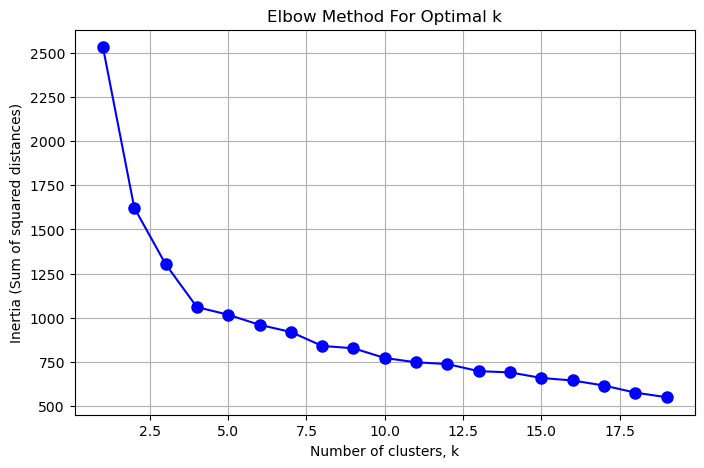

In [61]:
# ANSWER
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, 'bo-', markersize=8)
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

### 7. Plot `wt` vs. `pcBfat` using the clusters from each model.

- Plot wt, pcBfat using hue sex
- Plot wt, pcBfat using hue label

The labels calculated above can be a new column of the dataset.

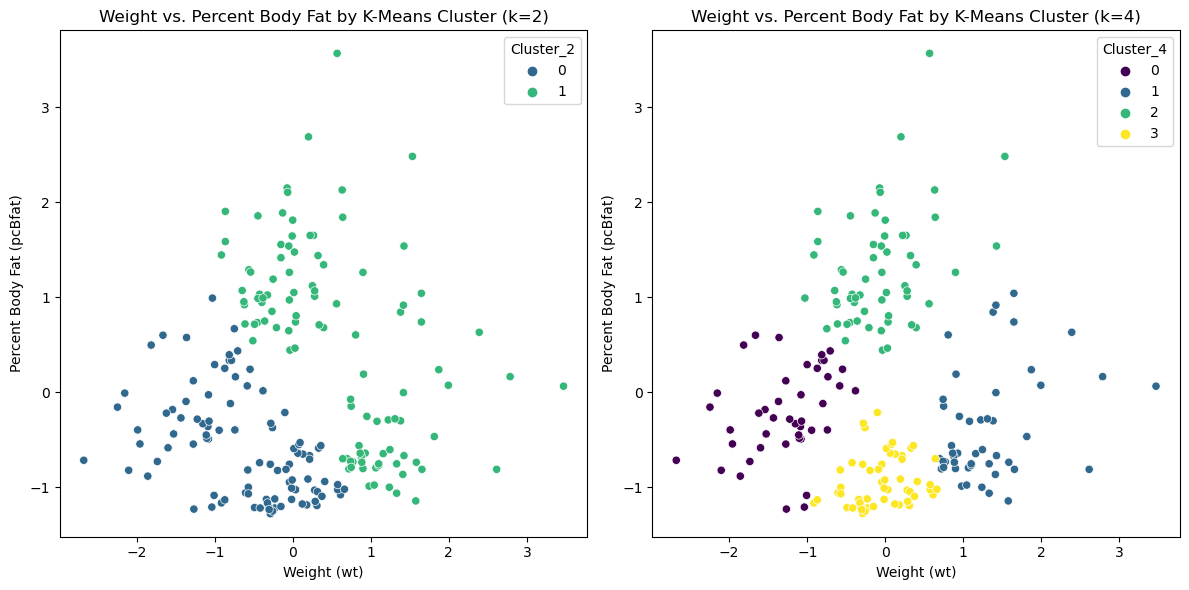

In [65]:
# ANSWER

df['Cluster_2'] = kmeans_2.labels_
df['Cluster_4'] = kmeans_4.labels_

# Plot wt vs. pcBfat Using the Clusters from Each Model
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Plot for k=2
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='wt', y='pcBfat', hue='Cluster_2', palette='viridis')
plt.title('Weight vs. Percent Body Fat by K-Means Cluster (k=2)')
plt.xlabel('Weight (wt)')
plt.ylabel('Percent Body Fat (pcBfat)')

# Plot for k=4
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='wt', y='pcBfat', hue='Cluster_4', palette='viridis')
plt.title('Weight vs. Percent Body Fat by K-Means Cluster (k=4)')
plt.xlabel('Weight (wt)')
plt.ylabel('Percent Body Fat (pcBfat)')

plt.tight_layout()
plt.show()




---



---



> > > > > > > > > © 2024 Institute of Data


---



---



